Project Submission Dicoding

Nama   : I Made Dwi Andika Saputra
e-mail : imadedwiandikasaputra@gmail.com

# Analisis Data Bike Sharing Dataset

Pertanyaan Analisis Data

1. User type manakah yang paling banyak dalam penyewaan sepeda?
2. Pada musim apakah terdapat jumlah penyewaan sepeda paling banyak?
3. Pada bulan apakah terdapat jumlah penyewaan sepeda paling banyak?
4. Pada jam berapakah rata-rata jumlah penyewaan sepeda tertinggi setiap harinya?
5. Bagaimana rata-rata jumlah penyewaan sepeda pada saat hari libur dan hari kerja?
6. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
7. Berapakah rata-rata suhu, kelembaban udara dan kecepatan angin pada setiap musimnya?
8. Bagaimana pengaruh suhu, atemp, windspeed, dan humidity terhadap jumlah penyewaan sepeda?


#### Data Wrangling

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Gathering Data

In [2]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
hour_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


###### Asessing Data

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melakukan cek duplikasi data

In [5]:
print('Jumlah Duplikasi data = ', hour_df.duplicated().sum())

Jumlah Duplikasi data =  0


Melakukan cek nilai NaN pada data

In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melakukan cek nilai null

In [7]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Mengecek value_counts masing-masing kolom

In [8]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
for column_name in ['season','yr','mnth','hr','holiday',
                    'weekday','workingday', 'weathersit']:
                    print(hour_df[column_name].value_counts(), '\n')

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64 

1    8734
0    8645
Name: yr, dtype: int64 

5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: mnth, dtype: int64 

17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: hr, dtype: int64 

0    16879
1      500
Name: holiday, dtype: int64 

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64 

1    11865
0     5514
Name: workingday, dtype: int64 

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64 



Print deskripsi data

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


###### Cleaning Data

Merubah nama kolom agar lebih mudah dibaca

In [11]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
hour_df.rename(columns = {
    'instant' : 'rec_in',
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather_condition',
    'temp' : 'temperature',
    'hum' : 'humidity',
    'cnt' : 'count'
}, inplace = True)

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_in             17379 non-null  int64  
 1   date               17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temperature        17379 non-null  float64
 11  atemp              17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  count              173

drop kolom rec_in

In [13]:
hour_df.drop('rec_in', axis = 1, inplace = True)

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               17379 non-null  object 
 1   season             17379 non-null  int64  
 2   year               17379 non-null  int64  
 3   month              17379 non-null  int64  
 4   hour               17379 non-null  int64  
 5   holiday            17379 non-null  int64  
 6   weekday            17379 non-null  int64  
 7   workingday         17379 non-null  int64  
 8   weather_condition  17379 non-null  int64  
 9   temperature        17379 non-null  float64
 10  atemp              17379 non-null  float64
 11  humidity           17379 non-null  float64
 12  windspeed          17379 non-null  float64
 13  casual             17379 non-null  int64  
 14  registered         17379 non-null  int64  
 15  count              17379 non-null  int64  
dtypes: float64(4), int64(1

Merubah Dtype pada kolom date menjadi datetime

In [15]:
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               17379 non-null  datetime64[ns]
 1   season             17379 non-null  int64         
 2   year               17379 non-null  int64         
 3   month              17379 non-null  int64         
 4   hour               17379 non-null  int64         
 5   holiday            17379 non-null  int64         
 6   weekday            17379 non-null  int64         
 7   workingday         17379 non-null  int64         
 8   weather_condition  17379 non-null  int64         
 9   temperature        17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

Merubah Dtype dari kolom season sampai weather_condition menjadi category

In [16]:
for i in ['season', 'year', 'month', 'hour', 'holiday',
          'weekday', 'weather_condition', 'workingday']:
          hour_df[i] = hour_df[i].astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               17379 non-null  datetime64[ns]
 1   season             17379 non-null  category      
 2   year               17379 non-null  category      
 3   month              17379 non-null  category      
 4   hour               17379 non-null  category      
 5   holiday            17379 non-null  category      
 6   weekday            17379 non-null  category      
 7   workingday         17379 non-null  category      
 8   weather_condition  17379 non-null  category      
 9   temperature        17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  regist

Konversi nilai suhu pada kolom temp (t = t`temp` * t`max`) dimana t`max` = 41

In [17]:
hour_df['temperature'] = hour_df['temperature'] * 41
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,9.84,0.2879,0.75,0.0,0,1,1


Konversi nilai *feeling temperature* (atemp) dimana t = t`atemp` * t`max` (t`max` = 50)

In [18]:
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,0.75,0.0,0,1,1


Konversi nilai humidity dimana humidity * 100 (humidity`maks` = 100)

In [19]:
hour_df['humidity'] = hour_df['humidity'] * 100
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


Konversi nilai kecepatan angin (windspeed) dimana windspeed*67 (windspeed`max` = 67)

In [20]:
hour_df['windspeed'] = hour_df['windspeed'] * 67
hour_df.head()

,date,season,year,month,hour,holiday,weekday,workingday,weather_condition,temperature,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,9.84,14.395,75.0,0.0,0,1,1


In [21]:
hour_df.describe()

,temperature,atemp,humidity,windspeed,casual,registered,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
std,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599
min,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


#### Exploratory Data Analysis

###### Q1 : User type manakah yang paling banyak dalam penyewaan sepeda

In [22]:
hour_df.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [23]:
total_df = hour_df.iloc[:,[13,14,15]]
total_df

,casual,registered,count
0,3,13,16
1,8,32,40
2,5,27,32
3,3,10,13
4,0,1,1
...,...,...,...
17374,11,108,119
17375,8,81,89
17376,7,83,90
17377,13,48,61


In [24]:
total_df.sum()

casual         620017
registered    2672662
count         3292679
dtype: int64

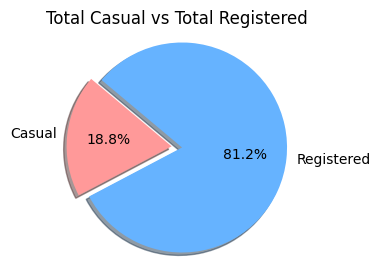

In [25]:
# visualisasi data dengan pie chart
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()
total_count = hour_df['count'].sum()

casual_percentage = (total_casual/total_count)*100
registered_percentage = (total_registered/total_count)*100

labels = ['Casual', 'Registered']
sizes = [casual_percentage, registered_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(3,3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Menampilkan diagram pie sebagai lingkaran
plt.title('Total Casual vs Total Registered')
plt.show()



> Diagram pie diatas menjelaskan bahwa sekitar 81,2 % termasuk dalam pengguna sepeda terdaftar (registered) dan hanya 18,8 % termasuk dalam pengguna sepeda tidak terdaftar (casual) Sehingga mayoritas pengguna sepeda dalam penyewaan sepeda ini adalah pengguna terdaftar (registered) yang mungkin adalah pengguna sepeda biasa.



###### Q2 : Pada musim apakah terdapat jumlah penyewaan sepeda paling banyak

In [26]:
year_map = {0 : '2011',
            1 : '2012'}

season_map = {1 : 'springer',
              2 : 'summer',
              3 : 'fall',
              4 : 'winter'}

In [27]:
season_result = hour_df.groupby(['year','season'])[['count']].sum().reset_index()
season_result['year'] = season_result['year'].map(year_map)
season_result['season'] = season_result['season'].map(season_map)
season_result

,year,season,count
0,2011,springer,150000
1,2011,summer,347316
2,2011,fall,419650
3,2011,winter,326137
4,2012,springer,321348
5,2012,summer,571273
6,2012,fall,641479
7,2012,winter,515476


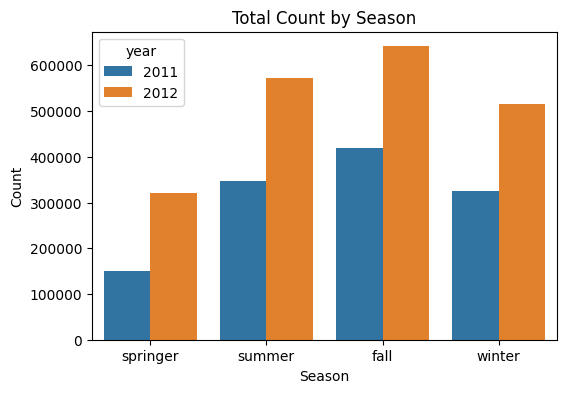

In [28]:
# Visualisasi Data
plt.figure(figsize=(6,4))
sns.barplot(x='season', y='count', hue='year', data=season_result)

# Atur label sumbu x
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Total Count by Season')
plt.show()

In [29]:
agg_hour_season = hour_df.groupby(['season', 'hour'])['count'].sum().reset_index()
agg_hour_season['season'] = agg_hour_season['season'].map(season_map)
agg_hour_season

,season,hour,count
0,springer,0,4878
1,springer,1,3229
2,springer,2,2175
3,springer,3,1108
4,springer,4,490
...,...,...,...
91,winter,19,52575
92,winter,20,37549
93,winter,21,28555
94,winter,22,21871


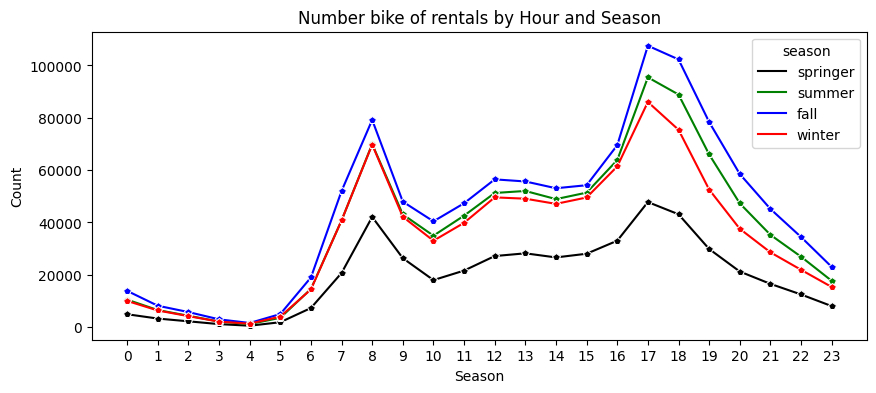

In [30]:
# visualisasi data
colors = ['black','green','blue','red']
plt.figure(figsize=(10,4))
sns.lineplot(x='hour', y='count', hue='season', data=agg_hour_season, palette=colors, marker='p')

# Atur label sumbu x
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Number bike of rentals by Hour and Season')
plt.xticks(range(24))
plt.show()



> Diagram batang diatas menunjukkan bahwa penyewaan sepeda tertinggi terjadi pada musim gugur Sehingga dapat dikatakan musim gugur adalah musim yang cocok untuk bersepeda



###### Q3 : Pada bulan apakah terdapat jumlah penyewaan sepeda paling banyak

In [31]:
month_map = {1 : 'january',
             2 : 'february',
             3 : 'march',
             4 : 'april',
             5 : 'may',
             6 : 'june',
             7 : 'july',
             8 : 'august',
             9 : 'september',
             10 : 'october',
             11 : 'november',
             12 : 'december'
}

In [32]:
month_result = hour_df.groupby(['year','month'])['count'].sum().reset_index()
month_result['year'] = month_result['year'].map(year_map)
month_result['month'] = month_result['month'].map(month_map)
month_result

,year,month,count
0,2011,january,38189
1,2011,february,48215
2,2011,march,64045
3,2011,april,94870
4,2011,may,135821
5,2011,june,143512
6,2011,july,141341
7,2011,august,136691
8,2011,september,127418
9,2011,october,123511


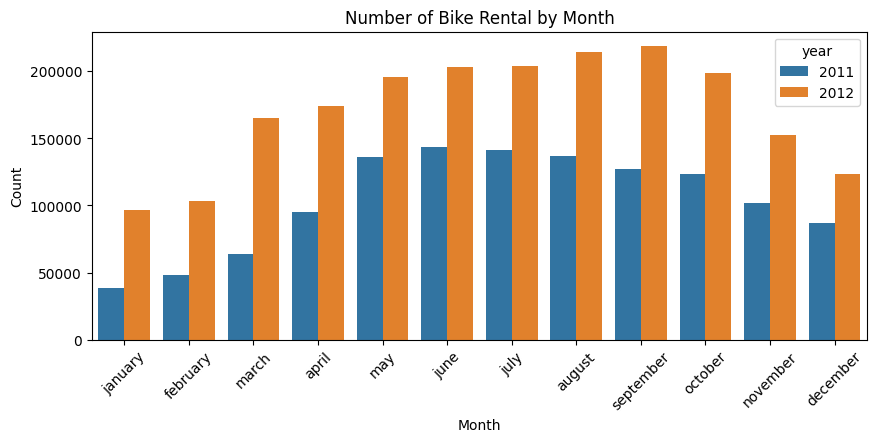

In [33]:
# visualisasi data
plt.figure(figsize=(10,4))
sns.barplot(x='month', y='count', hue='year', data=month_result)

# Atur label sumbu x
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Number of Bike Rental by Month')
plt.xticks(rotation = 45)
plt.show()

###### Q4 : Pada jam berapakah rata-rata jumlah penyewaan sepeda tertinggi setiap harinya

In [34]:
total_of_hour = hour_df.groupby(['year', 'hour'])['count'].mean().reset_index()
total_of_hour['year'] = total_of_hour['year'].map(year_map)
total_of_hour

,year,hour,count
0,2011,0,43.047091
1,2011,1,26.550000
2,2011,2,18.923295
3,2011,3,10.061404
4,2011,4,5.391691
5,2011,5,14.609065
6,2011,6,57.620499
7,2011,7,156.831956
8,2011,8,262.994490
9,2011,9,163.873278


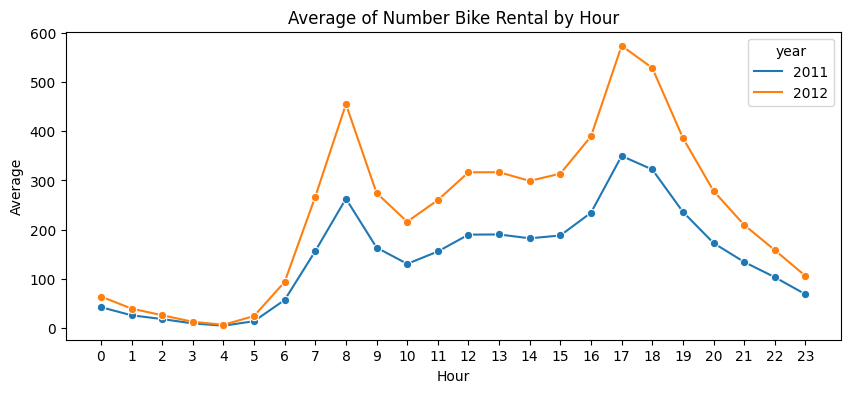

In [35]:
# visualisasi data
plt.figure(figsize=(10,4))
sns.lineplot(x='hour', y='count', hue='year', data=total_of_hour, marker='o')

# Atur label sumbu x
plt.xlabel('Hour')
plt.ylabel('Average')
plt.title('Average of Number Bike Rental by Hour')
plt.xticks(range(24))
plt.show()



> Diagram garis diatas menunjukkan bahwa rata-rata jumlah penyewaan sepeda tertinggi terjadi pada pukul 17.00 sehingga dapat dikatakan bahwa rata-rata para pengguna bersepeda pada sore hari entah bisa jadi jam pulang kerja atau sekedar hiburan



In [36]:
agg_hour_weekday = hour_df.groupby(['weekday', 'hour'])['count'].mean().reset_index()
agg_hour_weekday

,weekday,hour,count
0,0,0,93.990385
1,0,1,77.432692
2,0,2,61.627451
3,0,3,31.144231
4,0,4,9.362745
...,...,...,...
163,6,19,239.932692
164,6,20,180.865385
165,6,21,156.000000
166,6,22,139.663462


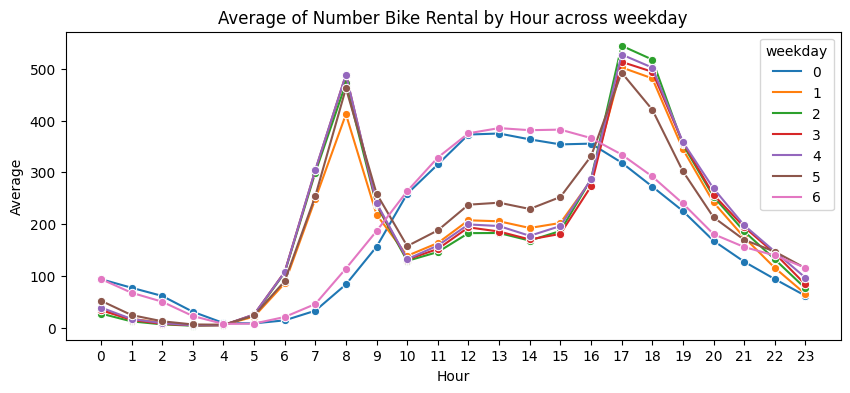

In [37]:
# visualisasi data
plt.figure(figsize=(10,4))
sns.lineplot(x='hour', y='count', hue='weekday', data=agg_hour_weekday, marker='o')

# Atur label sumbu x
plt.xlabel('Hour')
plt.ylabel('Average')
plt.title('Average of Number Bike Rental by Hour across weekday')
plt.xticks(range(24))
plt.show()



> Diagram garis diatas menunjukkan adanya tren kenaikan dari jam 7 hingga jam 16 pada weekday 0 dan 6. Sedangkan pada weekday 1 hingga 5 terjadi tren peningkatan dari jam 5 sampai jam 8 dan dari jam 15 hingga jam 17. Dapat dikatakan bahwa weekday 0 dan 6 adalah hari sabtu dan minggu yang biasanya rata-rata merupakan hari libur. Kemudian pada weekday 1 sampai 5 adalah hari senin - jumat yang rata-rata merupakan hari kerja.



###### Q5 : Bagaimana rata-rata jumlah penyewaan sepeda pada saat hari libur dan hari kerja

In [38]:
holiday_result = hour_df.groupby(['holiday','year'])['count'].mean().reset_index()
holiday_result['year'] = holiday_result['year'].map(year_map)
holiday_result

,holiday,year,count
0,0,2011,144.311325
1,0,2012,236.181164
2,1,2011,125.615063
3,1,2012,185.490421


In [39]:
workingday_result = hour_df.groupby(['workingday','year'])['count'].mean().reset_index()
workingday_result['year'] = workingday_result['year'].map(year_map)
workingday_result

,workingday,year,count
0,0,2011,141.491953
1,0,2012,220.658273
2,1,2011,144.859415
3,1,2012,241.206920


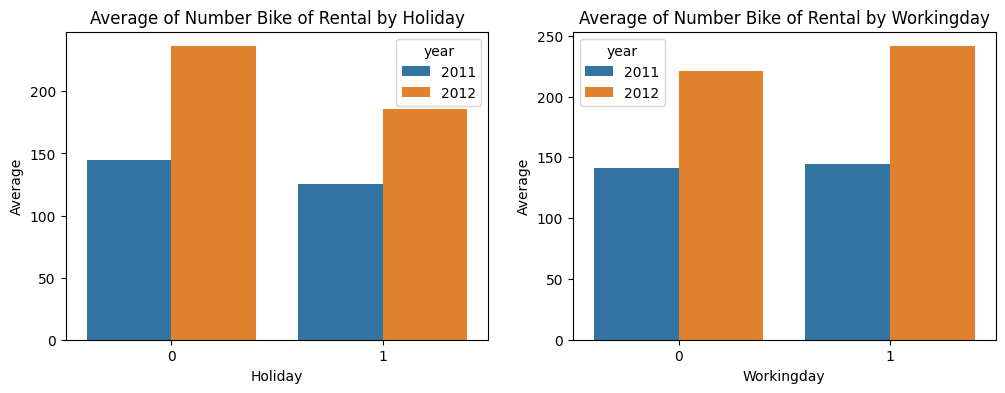

In [40]:
plt.figure(figsize=(12, 4))

# Subplot pertama - Average of Number Bike of Rental by Holiday
plt.subplot(1, 2, 1)
sns.barplot(x='holiday', y='count', hue='year', data=holiday_result)
plt.xlabel('Holiday')
plt.ylabel('Average')
plt.title('Average of Number Bike of Rental by Holiday')

# Subplot kedua - Average of Number Bike of Rental by Workingday
plt.subplot(1, 2, 2)
sns.barplot(x='workingday', y='count', hue='year', data=workingday_result)
plt.xlabel('Workingday')
plt.ylabel('Average')
plt.title('Average of Number Bike of Rental by Workingday')

# Tampilkan plot
plt.show()



> Kedua diagram batang diatas menunjukkan bahwa rata-rata jumlah penyewaan sepeda tertinggi pada saat hari libur (holiday) terdapat pada kode 0 yang artinya bukan hari libur. Kemudian rata-rata jumlah penyewaan tertinggi pada hari kerja (workingday) terdapat pada kode 1 yang artinya merupakan hari kerja. Sehingga dapat dikatakan bahwa rata-rata jumlah penyewaan sepeda tertinggi terjadi pada hari kerja. Hal ini dapat diasumsikan juga bahwa pengguna menggunakan sepeda sebagai sarana transportasi untuk sampai ke tempat kerja.



###### Q6 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda

In [41]:
weather_result = hour_df.groupby(['year','weather_condition'])['count'].sum().reset_index()
weather_result['year'] = weather_result['year'].map(year_map)
weather_result

,year,weather_condition,count
0,2011,1,875053
1,2011,2,300519
2,2011,3,67495
3,2011,4,36
4,2012,1,1463120
5,2012,2,495433
6,2012,3,90836
7,2012,4,187


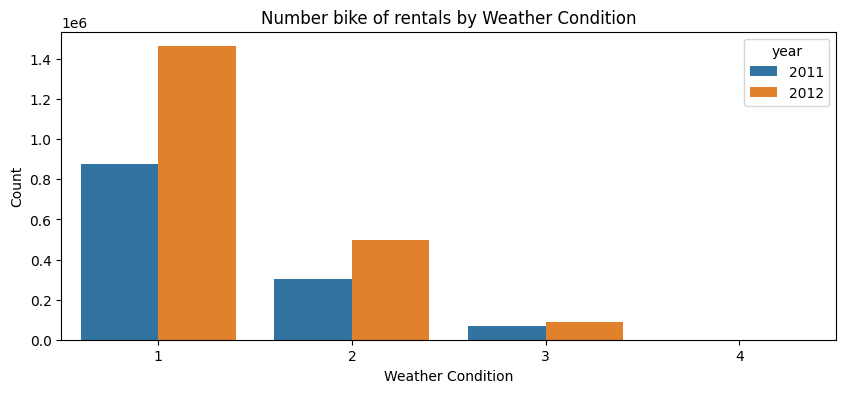

In [42]:
# visualisasi data
plt.figure(figsize=(10,4))
sns.barplot(x='weather_condition', y='count', hue='year', data=weather_result)

# Atur label sumbu x
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Number bike of rentals by Weather Condition')
plt.show()



> Diagram batang diatas menunjukkan bahwa jumlah penyewaan sepeda tertinggi terdapat pada kondisi cuaca kode 1 dan jumlah terendah terdapat pada kondisi cuaca kode 4. Berdasarkan informasi dari dataset bahwa
kode 1 adalah kondisi cuaca cerah hingga berawan.
kode 2 adalah kondisi cuaca kabut
kode 3 adalah kondisi cuaca salju ringan hingga hujan ringan
kode 4 adalah kondisi cuaca hujan lebat hingga badai petir
Sehingga dapat dikatakan bahwa kondisi cuaca cerah merupakan kondisi ideal untuk bersepeda sedangkan kondisi salju ringan hingga badai petir merupakan kondisi yang tidak ideal untuk bersepeda



###### Q7 : Berapakah rata-rata suhu, kelembaban udara dan kecepatan angin pada setiap musimnya?

Mencari rata-rata suhu setiap musim

In [43]:
temperature_result = hour_df.groupby(by = 'season').agg({
    'temperature' : ['sum', 'mean', 'median', 'max', 'min']
}).reset_index()
temperature_result['season'] = temperature_result['season'].map(season_map)
temperature_result

season temperature                                
                    sum       mean median    max    min
0  springer    52028.18  12.265012  11.48  29.52   0.82
1    summer    98458.22  22.331191  22.96  38.54   6.56
2      fall   130216.82  28.962816  28.70  41.00  15.58
3    winter    73419.52  17.348658  17.22  31.16   5.74

1. Rata-rata suhu pada musim semi (springer) adalah 12,26
2. Rata-rata suhu pada musim panas (summer) adalah 22,33
3. Rata-rata suhu pada musim gugur (fall) adalah 28,96
4. Rata-rata suhu pada musim dingin (winter) adalah 17,22

Mencari rata-rata kelembaban udara setiap musim

In [44]:
humidity_result = hour_df.groupby(by = 'season').agg({
    'humidity' : ['sum', 'mean', 'median']
}).reset_index()
humidity_result['season'] = humidity_result['season'].map(season_map)
humidity_result

season  humidity                  
                  sum       mean median
0  springer  246608.0  58.134842   56.0
1    summer  276454.0  62.702200   64.0
2      fall  284672.0  63.316726   65.0
3    winter  282327.0  66.712429   66.0

1. Rata-rata kelembaban udara pada musim semi (springer) adalah 58,13
2. Rata-rata kelembaban udara pada musim panas (summer) adalah 62,7
3. Rata-rata kelembaban udara pada musim gugur (fall) adalah 63,31
4. Rata-rata kelembaban udara pada musim dingin (winter) adalah 66,71

Mencari rata-rata kecepatan angin setiap musim

In [45]:
windspeed_result = hour_df.groupby(by = 'season').agg({
    'windspeed' : ['sum', 'mean', 'median']
}).reset_index()
windspeed_result['season'] = windspeed_result['season'].map(season_map)
windspeed_result

season   windspeed                    
                    sum       mean   median
0  springer  61136.4950  14.412186  12.9980
1    summer  60088.0053  13.628488  12.9980
2      fall  51689.2270  11.496714  11.0014
3    winter  48434.5948  11.444848  11.0014

1. Rata-rata kecepatan angin pada musim semi (springer) adalah 14,41
2. Rata-rata kecepatan angin pada musim panas (summer) adalah 13,62
3. Rata-rata kecepatan angin pada musim gugur (fall) adalah 11,49
4. Rata-rata kecepatan angin pada musim dingin (winter) adalah 11,44

###### Q8 : Bagaimana pengaruh suhu, atemp, windspeed, dan humidity terhadap jumlah penyewaan sepeda

In [46]:
hour_df.columns

Index(['date', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [47]:
temperature_analysis = hour_df.iloc[:,[9,13,14,15]]
atemp_analysis = hour_df.iloc[:,[10,13,14,15]]
humidity_analysis = hour_df.iloc[:,[11,13,14,15]]
windspeed_analysis = hour_df.iloc[:,[12,13,14,15]]

for i in [temperature_analysis, atemp_analysis, humidity_analysis, windspeed_analysis]:
  print(i)

       temperature  casual  registered  count
0             9.84       3          13     16
1             9.02       8          32     40
2             9.02       5          27     32
3             9.84       3          10     13
4             9.84       0           1      1
...            ...     ...         ...    ...
17374        10.66      11         108    119
17375        10.66       8          81     89
17376        10.66       7          83     90
17377        10.66      13          48     61
17378        10.66      12          37     49

[17379 rows x 4 columns]
        atemp  casual  registered  count
0      14.395       3          13     16
1      13.635       8          32     40
2      13.635       5          27     32
3      14.395       3          10     13
4      14.395       0           1      1
...       ...     ...         ...    ...
17374  12.880      11         108    119
17375  12.880       8          81     89
17376  12.880       7          83     90
17377  13.63

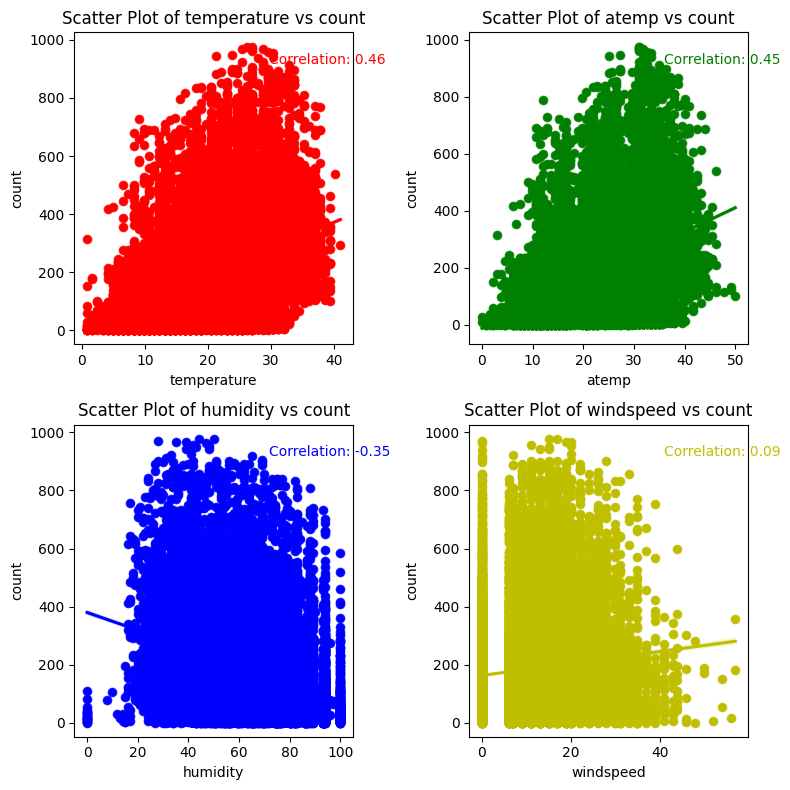

In [48]:
variables = [temperature_analysis, atemp_analysis, humidity_analysis, windspeed_analysis]

# Mengatur tampilan subplot
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# List warna garis korelasi
colors = ['r', 'g', 'b', 'y']

for i, data in enumerate(variables):
    # Membagi indeks baris dan kolom subplot
    row = i // 2
    col = i % 2

    # Scatter plot
    ax = axes[row, col]
    sns.scatterplot(data=data, x=data.columns[0], y=data.columns[3], ax=ax, color=colors[i])
    sns.regplot(data=data, x=data.columns[0], y=data.columns[3], ax=ax, color=colors[i])
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[3])
    ax.set_title(f'Scatter Plot of {data.columns[0]} vs {data.columns[3]}')

    # Korelasi
    correlation = data.corr().iloc[0, 1]
    ax.annotate(f'Correlation: {correlation:.2f}', xy=(0.7, 0.9), xycoords='axes fraction', color=colors[i])

plt.tight_layout()
plt.show()

Dari keempat scatter plot dapat dianalisis sebagai berikut
1. Jumlah penyewaan sepeda bertambah seiring dengan kenaikan temperature
2. Jumlah penyewaan sepeda bertambah seiring dengan kenaikan atemp (feeling temperature)
3. Jumlah penyewaan sepeda berkurang seiring dengan meningkatnya humidity
4. Jumlah penyewaan sepeda bertambah seiring dengan meningkatnya windspeed
5. Hanya humidity yang memiliki korelasi negatif sehingga tidak memiliki hubungan dengan jumlah penyewaan sepeda

### Conclusion

1. User type manakah yang paling banyak dalam penyewaan sepeda?


> Dari Diagram pie diatas menjelaskan bahwa sekitar 81,2 % termasuk dalam pengguna sepeda terdaftar (registered) dan hanya 18,8 % termasuk dalam pengguna sepeda tidak terdaftar (casual) Sehingga mayoritas pengguna sepeda dalam penyewaan sepeda ini adalah pengguna terdaftar (registered) yang mungkin adalah pengguna sepeda biasa


2. Pada musim apakah terdapat jumlah penyewaan sepeda paling banyak?


> penyewaan sepeda tertinggi terjadi pada musim gugur Sehingga dapat dikatakan musim gugur adalah musim yang cocok untuk bersepeda


3. Pada bulan apakah terdapat jumlah penyewaan sepeda paling banyak?


> Pada bulan Agustus dan September


4. Pada jam berapakah rata-rata jumlah penyewaan sepeda tertinggi setiap harinya?


> Dari hasil analisis data menunjukkan adanya tren kenaikan dari jam 7 hingga jam 16 pada weekday 0 dan 6. Sedangkan pada weekday 1 hingga 5 terjadi tren peningkatan dari jam 5 sampai jam 8 dan dari jam 15 hingga jam 17. Dapat dikatakan bahwa weekday 0 dan 6 adalah hari sabtu dan minggu yang biasanya rata-rata merupakan hari libur. Kemudian pada weekday 1 sampai 5 adalah hari senin - jumat yang rata-rata merupakan hari kerja.


5. Bagaimana rata-rata jumlah penyewaan sepeda pada saat hari libur dan hari kerja?


> Rata-rata jumlah penyewaan sepeda tertinggi pada saat hari libur (holiday) terdapat pada kode 0 yang artinya bukan hari libur. Kemudian rata-rata jumlah penyewaan tertinggi pada hari kerja (workingday) terdapat pada kode 1 yang artinya merupakan hari kerja. Sehingga dapat dikatakan bahwa rata-rata jumlah penyewaan sepeda tertinggi terjadi pada hari kerja. Hal ini dapat diasumsikan juga bahwa pengguna menggunakan sepeda sebagai sarana transportasi untuk sampai ke tempat kerja.


6. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?


> jumlah penyewaan sepeda tertinggi terdapat pada kondisi cuaca kode 1 dan jumlah terendah terdapat pada kondisi cuaca kode 4. Berdasarkan informasi dari dataset bahwa kode 1 adalah kondisi cuaca cerah hingga berawan. kode 2 adalah kondisi cuaca kabut kode 3 adalah kondisi cuaca salju ringan hingga hujan ringan kode 4 adalah kondisi cuaca hujan lebat hingga badai petir Sehingga dapat dikatakan bahwa kondisi cuaca cerah merupakan kondisi ideal untuk bersepeda sedangkan kondisi salju ringan hingga badai petir merupakan kondisi yang tidak ideal untuk bersepeda


7. Berapakah rata-rata suhu, kelembaban udara dan kecepatan angin pada setiap musimnya?


> Berdasarkan hasil dari analisis data didapat kesimpulan bahwa rata-rata dari suhu, kelembaban udara dan kecepatan angin pada setiap musimnya sangat bervariasi nilainya


8. Bagaimana pengaruh suhu, atemp, windspeed, dan humidity terhadap jumlah penyewaan sepeda?


> Jumlah penyewaan sepeda bertambah seiring dengan kenaikan temperature
Jumlah penyewaan sepeda bertambah seiring dengan kenaikan atemp (feeling temperature)
Jumlah penyewaan sepeda berkurang seiring dengan meningkatnya humidity
Jumlah penyewaan sepeda bertambah seiring dengan meningkatnya windspeed
Hanya humidity yang memiliki korelasi negatif sehingga tidak memiliki hubungan dengan jumlah penyewaan sepeda

